<a href="https://colab.research.google.com/github/rohitrrk22/Deep-Learning/blob/master/Deep_Learning_NLP/Spam_Filter_For_Quora_Questions/FastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
import pandas as pd
import numpy as np

In [3]:
!wget https://www.dropbox.com/sh/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla

--2020-08-29 17:12:14--  https://www.dropbox.com/sh/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla [following]
--2020-08-29 17:12:14--  https://www.dropbox.com/sh/raw/kpf9z73woodfssv/AAAw1_JIzpuVvwteJCma0xMla
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3d10098aa86d1861989df386df.dl.dropboxusercontent.com/zip_download_get/AhyTE_HlG3r8Cz1UGGLUY2UQaKof9mtK-l1RhwvXv-dSjx9QJz3qgyGAFueQj0jAnRvkhpbsgpEceWsRz5EIB23SXRJyQOzZTOUvCeGeGYMA9g [following]
--2020-08-29 17:12:15--  https://uc3d10098aa86d1861989df386df.dl.dropboxusercontent.com/zip_download_get/AhyTE_HlG3r8Cz1UGGLUY2UQaKof9mtK-l1RhwvXv-dSjx9QJz3qgyGAFueQj0jAnRvkhpbsgpEceWsRz5EIB23SX

In [4]:
train = pd.read_csv(r'/content/spam_quora_data',encoding='ISO-8859-1')

In [5]:
train.dropna(axis=0 , how='any',inplace=True)
train.rename(columns={'PK': 'qid'},inplace=True)

In [6]:
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0.0


In [7]:
from sklearn.model_selection import train_test_split

#Train & Test dataset
quora_train,quora_test=train_test_split(train,test_size=0.2,random_state=2)

del quora_train["qid"]

In [8]:
quora_train.shape

(1044897, 2)

In [9]:
quora_test.reset_index(drop=True, inplace=True)

In [10]:
quora_test.head()

,qid,question_text,target
0,8747d2afef04f494fd71,"How does stopping refugee families, women and ...",1.0
1,5ad7be48609f9b63a5b0,What makes you start your business?,0.0
2,be9e2e86a915f88212f9,"Someone said they wouldn't give me something ""...",0.0
3,bc721413105adba6d757,What is best option for a disqualified medical...,0.0
4,79a5f298b4b5dbac4dd7,What are the best sites to create apps on Andr...,0.0


In [11]:
#Train dataset split into train & validation dataset
quora_trn,quora_val=train_test_split(quora_train,test_size=0.2,random_state=2)

In [12]:
quora_trn.reset_index(drop=True, inplace=True)

In [13]:
quora_val.reset_index(drop=True, inplace=True)

In [14]:
x_train=quora_trn['question_text']
y_train=quora_trn['target']
x_test=quora_val['question_text']     
y_test=quora_val['target']

In [15]:
x_test.shape

(208980,)

In [16]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip

--2020-08-29 17:12:53--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10356881291 (9.6G) [application/zip]
Saving to: ‘wiki.en.zip’

wiki.en.zip         100%[===================>]   9.65G  49.7MB/s    in 3m 50s  

2020-08-29 17:16:44 (42.9 MB/s) - ‘wiki.en.zip’ saved [10356881291/10356881291]



In [17]:
!unzip wiki.en.zip

Archive:  wiki.en.zip
  inflating: wiki.en.vec             
  inflating: wiki.en.bin             


In [18]:
!rm /content/wiki.en.zip

In [19]:
from gensim.models import FastText

In [20]:
ft_model = FastText.load_fasttext_format('/content/wiki.en.bin')


In [21]:
len(ft_model['random'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


300

In [ ]:
# ft_model['heldo']

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM,Activation,Dense,Input,Embedding,Dropout
from tensorflow.keras.models import Model
from nltk import word_tokenize

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
sent_lens=[len(word_tokenize(x)) for x in x_train]

In [25]:
np.percentile(sent_lens,95)

30.0

In [26]:
max_len=30

tk=Tokenizer(char_level=False,split=' ')

tk.fit_on_texts(x_train)

seq_train=tk.texts_to_sequences(x_train)
seq_test=tk.texts_to_sequences(x_test)

vocab_size=len(tk.word_index)

seq_train_matrix=sequence.pad_sequences(seq_train,maxlen=max_len)
seq_test_matrix=sequence.pad_sequences(seq_test,maxlen=max_len)

In [27]:
vocab_size

173214

In [29]:
embedding_matrix=np.zeros((vocab_size+1,300))
words_not_available=0
for word,i in tk.word_index.items():
    try:
      embed_vector=ft_model[word]
      embedding_matrix[i]=embed_vector
    except:
      words_not_available+=1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [30]:
words_not_available

1

In [32]:
# Now while creating the model for text data , we'll keep embedding layer weights 
# non-trainable as we are supplying those values from our end 

inputs=Input(name='text_input',shape=[max_len])
embed=Embedding(vocab_size+1,300,input_length=max_len,mask_zero=True,
                weights=[embedding_matrix],trainable=False)(inputs)
lstm_layer=LSTM(150)(embed)
dense1=Dense(75,activation='relu')(lstm_layer)
drop1=Dropout(0.2)(dense1)
dense2=Dense(35,activation='relu')(drop1)
drop2=Dropout(0.2)(dense2)
dense3=Dense(15,activation='relu')(drop2)
drop3=Dropout(0.2)(dense3)
final_layer=Dense(1,activation='sigmoid')(drop3)

model=Model(inputs=inputs,outputs=final_layer)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_input (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 30, 300)           51964500  
_________________________________________________________________
lstm (LSTM)                  (None, 150)               270600    
_________________________________________________________________
dense (Dense)                (None, 75)                11325     
_________________________________________________________________
dropout (Dropout)            (None, 75)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 35)                2660      
_________________________________________________________________
dropout_1 (Dropout)          (None, 35)               

In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
history = model.fit(
    seq_train_matrix, y_train, batch_size=120, epochs=2, validation_data=(seq_test_matrix, y_test)
)

Epoch 1/2
6966/6966 [==============================] - 487s 70ms/step - loss: 0.1260 - accuracy: 0.9514 - val_loss: 0.1116 - val_accuracy: 0.9566
Epoch 2/2
6966/6966 [==============================] - 481s 69ms/step - loss: 0.1091 - accuracy: 0.9569 - val_loss: 0.1071 - val_accuracy: 0.9579


In [36]:
p=model.predict(seq_test_matrix)

In [37]:
from sklearn.metrics import roc_auc_score,confusion_matrix
roc_auc_score(y_test,p)

0.9604547738966392

In [38]:
model.save("my_h5_model_FastText.h5")

In [40]:
#Merging train and validation data set
X_train=pd.concat([x_train,x_test],axis=0)
Y_train=pd.concat([y_train,y_test],axis=0)

In [41]:
quora_test.reset_index(drop=True,inplace=True)

In [43]:
X_test=quora_test['question_text']     
Y_test=quora_test['target']

In [44]:
sent_lens=[len(word_tokenize(x)) for x in X_train]
np.percentile(sent_lens,95)

30.0

In [45]:
max_len=30

tk=Tokenizer(char_level=False,split=' ')

tk.fit_on_texts(X_train)

seq_train=tk.texts_to_sequences(X_train)
seq_test=tk.texts_to_sequences(X_test)

vocab_size=len(tk.word_index)

seq_train_matrix=sequence.pad_sequences(seq_train,maxlen=max_len)
seq_test_matrix=sequence.pad_sequences(seq_test,maxlen=max_len)

In [49]:
vocab_size

196220

In [47]:
embedding_matrix=np.zeros((vocab_size+1,300))
words_not_available=0
for word,i in tk.word_index.items():
    try:
      embed_vector=ft_model[word]
      embedding_matrix[i]=embed_vector
    except:
      words_not_available+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [50]:
words_not_available

1

In [51]:
# LSTM Model with Glove Embedding Layer

inputs=Input(name='text_input',shape=[max_len])
embed=Embedding(vocab_size+1,300,input_length=max_len,mask_zero=True,
                weights=[embedding_matrix],trainable=False)(inputs)
lstm_layer=LSTM(150)(embed)
dense1=Dense(75,activation='relu')(lstm_layer)
drop1=Dropout(0.2)(dense1)
dense2=Dense(35,activation='relu')(drop1)
drop2=Dropout(0.2)(dense2)
dense3=Dense(15,activation='relu')(drop2)
drop3=Dropout(0.2)(dense3)
final_layer=Dense(1,activation='sigmoid')(drop3)

model=Model(inputs=inputs,outputs=final_layer)

model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_input (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 30, 300)           58866300  
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               270600    
_________________________________________________________________
dense_8 (Dense)              (None, 75)                11325     
_________________________________________________________________
dropout_6 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 35)                2660      
_________________________________________________________________
dropout_7 (Dropout)          (None, 35)               

In [52]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(seq_train_matrix,Y_train,validation_data=(seq_test_matrix,Y_test),epochs=2,batch_size=150)

Epoch 1/2
6966/6966 [==============================] - 487s 70ms/step - loss: 0.1248 - accuracy: 0.9523 - val_loss: 0.1088 - val_accuracy: 0.9568
Epoch 2/2
6966/6966 [==============================] - 483s 69ms/step - loss: 0.1084 - accuracy: 0.9572 - val_loss: 0.1041 - val_accuracy: 0.9583


In [53]:
model.evaluate(seq_test_matrix, Y_test, batch_size=150)

1742/1742 [==============================] - 15s 8ms/step - loss: 0.1041 - accuracy: 0.9583


[0.10409432649612427, 0.9582964777946472]

In [54]:
#Prediction on Test Data Set
predict=model.predict(seq_test_matrix)

In [55]:
from sklearn.metrics import roc_auc_score,confusion_matrix
roc_auc_score(Y_test,predict)

0.9626150383222687

In [56]:
Y_Predicted = pd.DataFrame(predict, index=range(predict.shape[0]),
                     columns=range(predict.shape[1]))

In [57]:
Y_Predicted = np.where(Y_Predicted > 0.5, 1, 0)
Y_test=Y_test.astype(int)

In [58]:
Y_Predicted = pd.DataFrame(list(Y_Predicted),columns=['Predicted Target'])
Y_Actual = pd.DataFrame(Y_test.values,columns=["Actual Target"])
Final_Comparison=pd.concat([quora_test['qid'],quora_test['question_text'],Y_Actual,Y_Predicted],axis=1)

In [59]:
Final_Comparison.head(10)

,qid,question_text,Actual Target,Predicted Target
0,8747d2afef04f494fd71,"How does stopping refugee families, women and ...",1,0
1,5ad7be48609f9b63a5b0,What makes you start your business?,0,0
2,be9e2e86a915f88212f9,"Someone said they wouldn't give me something ""...",0,0
3,bc721413105adba6d757,What is best option for a disqualified medical...,0,0
4,79a5f298b4b5dbac4dd7,What are the best sites to create apps on Andr...,0,0
5,ff1fd33a96c6c72b61b6,Which is the best homeopathic face wash for wo...,0,0
6,251b29aa445efc14aa04,Is it possible that the laws of physics may ha...,0,0
7,412350e4aaa272a16f81,What's your take on the dispute between core d...,0,0
8,bfd87b2feffdeee55656,What is the basic difference between Automatic...,0,0
9,99a93d95d6d030de6205,How is the taste of SirkkaleipÃ¤?,0,0


In [60]:
confusion_matrix(Y_Actual,Y_Predicted)

array([[242210,   3024],
       [  7870,   8121]])

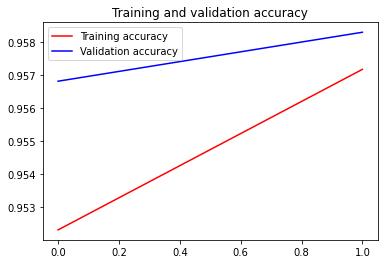

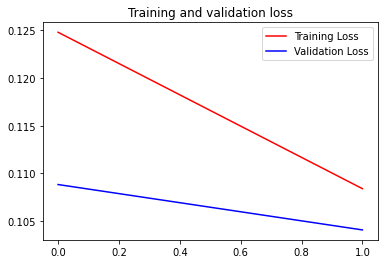

In [61]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()